<a href="https://colab.research.google.com/github/archanags001/tensorflow/blob/main/multiclass_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--2022-04-11 19:09:46--  https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.125.128, 142.250.157.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘rps.zip’

rps.zip             100%[===================>] 191.38M  32.9MB/s    in 5.8s    

2022-04-11 19:09:52 (32.9 MB/s) - ‘rps.zip’ saved [200682221/200682221]

--2022-04-11 19:09:52--  https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.125.128, 142.250.157.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘rps-tes

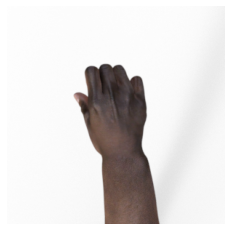

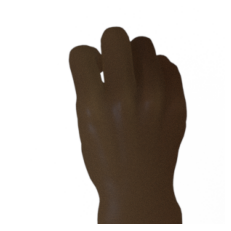

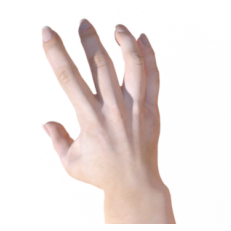

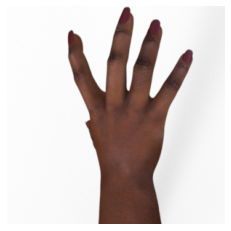

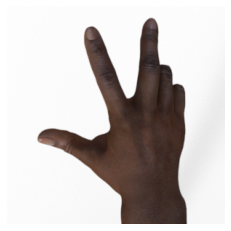

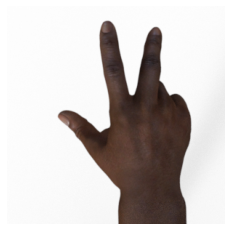

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

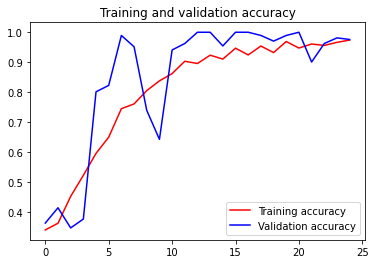

In [3]:
import os
import zipfile
# import wget
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Download the train set
!wget 'https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip'

# Download the test set
!wget 'https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip'

# Extract the archive
local_zip = './rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/rps-train')
zip_ref.close()

local_zip = './rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/rps-test')
zip_ref.close()

base_dir = 'tmp/rps-train/rps'

rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])



import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname)
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname)
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname)
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

# Build model

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')

])

model.summary()

# Set the training parameters
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Prepare the ImageDataGenerator

TRAINING_DIR = "tmp/rps-train/rps"
VALIDATION_DIR = "tmp/rps-test/rps-test-set"

training_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150,150),
    class_mode='categorical',
    batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(150,150),
    class_mode='categorical',
    batch_size=126
)

# Train the model and evaluate the results
history = model.fit(
    train_generator,
    epochs=25,
    steps_per_epoch=20,
    validation_data=validation_generator,
    verbose=1,
    validation_steps=3
)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
# plt.figure()
plt.show()


In [ ]:
# # save the model to disk
# import pickle
# filename = 'finalized_model.sav'
# pickle.dump(model, open(filename, 'wb'))
 
 
# # load the model from disk
# model = pickle.load(open(filename, 'rb'))


['scissors3.png', 'paper8.png', 'rock3.png', 'rock2.png', 'rock5.png', 'scissors4.png', 'paper-hires2.png', 'paper6.png', 'scissors6.png', 'paper7.png', 'scissors-hires2.png', 'scissors2.png', 'rock9.png', 'scissors8.png', 'paper4.png', 'paper1.png', 'scissors1.png', 'rock6.png', 'paper3.png', 'paper5.png', 'scissors7.png', 'rock7.png', 'rock-hires1.png', 'rock1.png', 'paper-hires1.png', 'rock4.png', 'scissors9.png', 'paper9.png', 'paper2.png', 'scissors-hires1.png', 'rock8.png', 'scissors5.png', 'rock-hires2.png']



/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


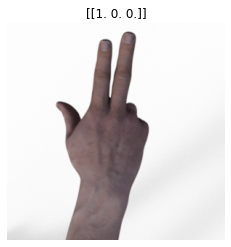

tmp/images/scissors3.png
[[1. 0. 0.]]



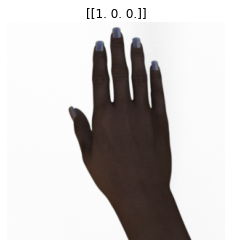

tmp/images/paper8.png
[[1. 0. 0.]]



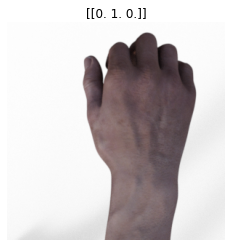

tmp/images/rock3.png
[[0. 1. 0.]]



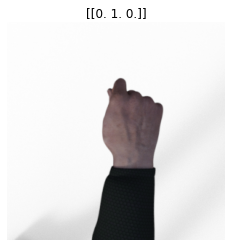

tmp/images/rock2.png
[[0. 1. 0.]]



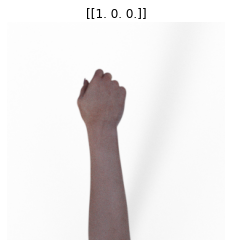

tmp/images/rock5.png
[[1. 0. 0.]]



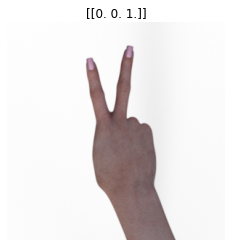

tmp/images/scissors4.png
[[0. 0. 1.]]



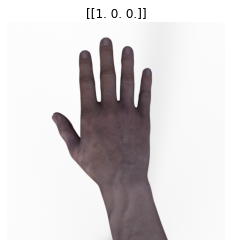

tmp/images/paper-hires2.png
[[1. 0. 0.]]



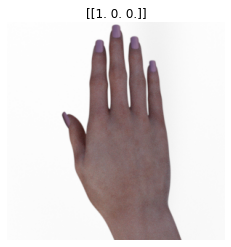

tmp/images/paper6.png
[[1. 0. 0.]]



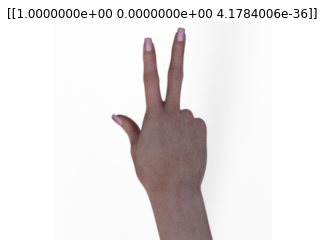

tmp/images/scissors6.png
[[1.0000000e+00 0.0000000e+00 4.1784006e-36]]



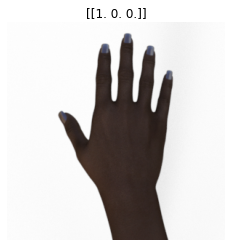

tmp/images/paper7.png
[[1. 0. 0.]]



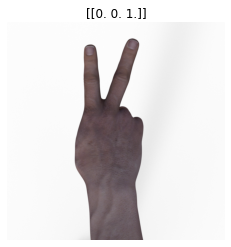

tmp/images/scissors-hires2.png
[[0. 0. 1.]]



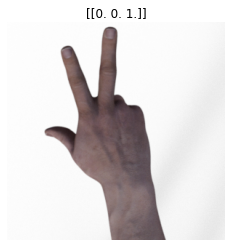

tmp/images/scissors2.png
[[0. 0. 1.]]



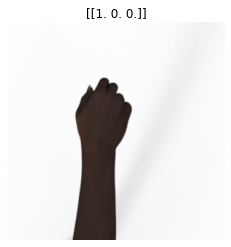

tmp/images/rock9.png
[[1. 0. 0.]]



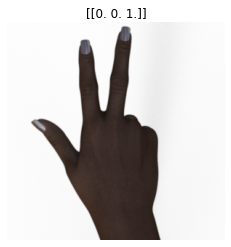

tmp/images/scissors8.png
[[0. 0. 1.]]



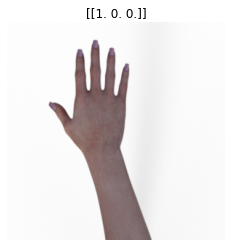

tmp/images/paper4.png
[[1. 0. 0.]]



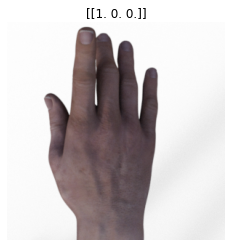

tmp/images/paper1.png
[[1. 0. 0.]]



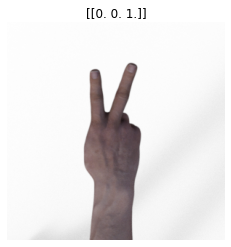

tmp/images/scissors1.png
[[0. 0. 1.]]



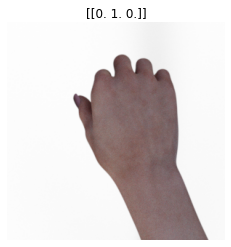

tmp/images/rock6.png
[[0. 1. 0.]]



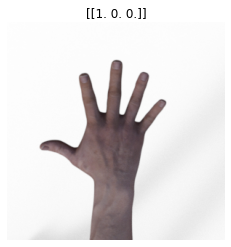

tmp/images/paper3.png
[[1. 0. 0.]]



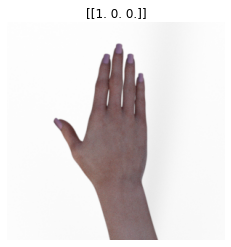

tmp/images/paper5.png
[[1. 0. 0.]]



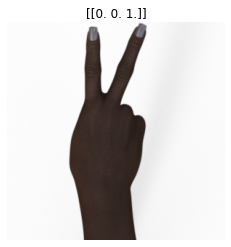

tmp/images/scissors7.png
[[0. 0. 1.]]



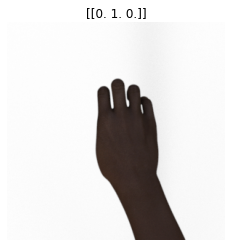

tmp/images/rock7.png
[[0. 1. 0.]]



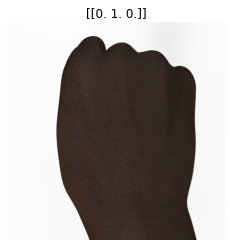

tmp/images/rock-hires1.png
[[0. 1. 0.]]



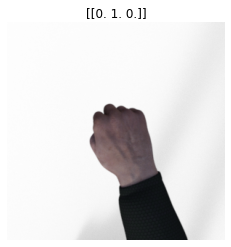

tmp/images/rock1.png
[[0. 1. 0.]]



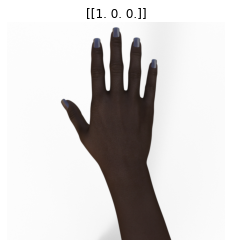

tmp/images/paper-hires1.png
[[1. 0. 0.]]



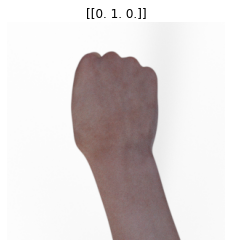

tmp/images/rock4.png
[[0. 1. 0.]]



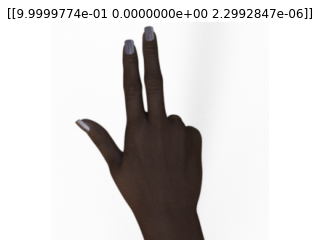

tmp/images/scissors9.png
[[9.9999774e-01 0.0000000e+00 2.2992847e-06]]



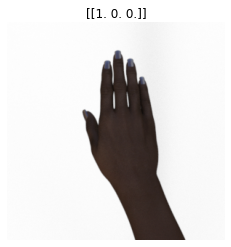

tmp/images/paper9.png
[[1. 0. 0.]]



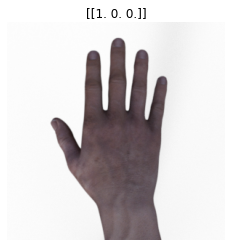

tmp/images/paper2.png
[[1. 0. 0.]]



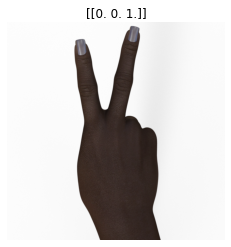

tmp/images/scissors-hires1.png
[[0. 0. 1.]]



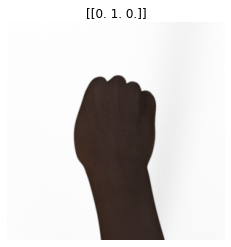

tmp/images/rock8.png
[[0. 1. 0.]]



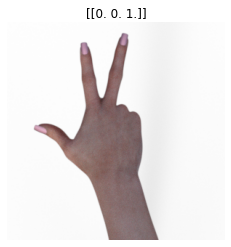

tmp/images/scissors5.png
[[0. 0. 1.]]



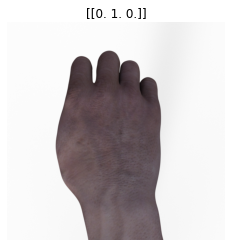

tmp/images/rock-hires2.png
[[0. 1. 0.]]


In [8]:

import os
import numpy as np
from keras.preprocessing import image

images = os.listdir("tmp/images")

print(images)

for i in images:
    print()
    # predicting images
    path = 'tmp/images/' + i
    img = image.load_img(path, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    img = mpimg.imread(path)
    plt.imshow(img)
    plt.title(classes)
    plt.axis('Off')
    plt.show()
    print(path)
    print(classes)